<a href="https://colab.research.google.com/github/ybernaerts/varimax-gradient/blob/main/algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
L = 5 # pick latent dimension

## Sample rotation and loading matrix

In [3]:
# Generate a random LxL matrix
random_matrix = np.random.randn(L, L)

# Perform QR decomposition
U,_,Vt = np.linalg.svd(random_matrix)
R = U @ Vt
print("Orthogonal matrix:")
print(R)

# Verify orthogonality (R @ R.T should be close to the identity matrix)
identity_check = R @ R.T

print("\nVerification (R @ R.T):")
print(identity_check)

Orthogonal matrix:
[[-0.11489821  0.7215443   0.06037254 -0.67573363 -0.07688591]
 [-0.52263902 -0.37844043 -0.50873092 -0.40617245  0.39981007]
 [ 0.36714238 -0.14442263 -0.62060282 -0.19836164 -0.64796094]
 [ 0.75333813 -0.00275897 -0.12334269 -0.21150594  0.61034898]
 [-0.10646595  0.56150793 -0.58067782  0.54251811  0.20460013]]

Verification (R @ R.T):
[[ 1.00000000e+00  8.83173423e-16 -4.15883173e-17 -2.04251904e-16
   2.27443752e-16]
 [ 8.83173423e-16  1.00000000e+00 -1.69649624e-16  9.60369582e-17
  -3.23291227e-16]
 [-4.15883173e-17 -1.69649624e-16  1.00000000e+00  3.26649248e-16
   2.35037644e-16]
 [-2.04251904e-16  9.60369582e-17  3.26649248e-16  1.00000000e+00
   2.71180976e-16]
 [ 2.27443752e-16 -3.23291227e-16  2.35037644e-16  2.71180976e-16
   1.00000000e+00]]


Imagine we have a loading matrix neurons by  2 latents which we want to rotate as to satisfy the varimax objective.

In [4]:
N = 10
C_init = np.random.randn(N,L)
C_rot = C_init @ R

Text(0, 0.5, 'Latent 2')

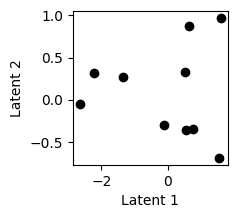

In [5]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter(C_rot[:,0],C_rot[:,1], color='k')
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')

In [6]:
# current varimax objective per latent
1/N*np.sum(C_rot**4, axis=0)-(1/(N**2))*np.sum(C_rot**2,axis=0)**2

array([4.77824945, 0.09837147, 0.4101561 , 0.80437539, 0.81426642])

In [7]:
# final varimax objective
np.sum(
    1/N*np.sum(C_rot**4, axis=0)-(1/(N**2))*np.sum(C_rot**2,axis=0)**2
)

np.float64(6.905418834069426)

## Check Analyticity

Checking analytically derived gradient of varimax objective wrt $\mathbf{C}$.

In [8]:
def varimax(C):
  N = C.shape[0]
  return np.sum(1/N*np.sum(C**4, axis=0)-(1/(N**2))*np.sum(C**2,axis=0)**2)

In [9]:
f=lambda C: varimax(C)
def finite_difference_gradient(f, C, h=1e-5):
    grad = np.zeros_like(C)
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            E = np.zeros_like(C)
            E[i, j] = 1
            grad[i, j] = (f(C + h * E) - f(C - h * E)) / (2 * h)
    return grad

In [10]:
finite_difference_gradient(f, C_rot)

array([[-0.37898048,  0.02172414,  0.82714296, -0.09309559,  0.06336216],
       [-0.4101235 ,  0.17068509, -0.06736706,  0.75712809,  0.04835195],
       [-0.43420741,  0.02226593,  0.29488196,  0.04547129,  1.49284511],
       [ 0.21350389, -0.05209188, -0.00865135,  0.12269914, -0.06698428],
       [-5.25327875,  0.00600698,  0.09903588,  0.12242877, -0.68361735],
       [ 0.32017307,  0.25871078, -0.09470894, -0.1041383 ,  0.0604494 ],
       [ 0.11443713, -0.02243807,  0.0937865 , -0.1142219 ,  0.06870577],
       [-0.3607335 , -0.02259423,  0.20598925, -0.12380942,  0.0168429 ],
       [ 0.10371816,  0.02285531, -0.08723979, -0.70955423, -0.05013063],
       [-2.51878308, -0.02287306,  0.08785533,  0.82642014,  0.06803566]])

In [11]:
s = 1/N*np.sum(C_rot**2, axis=0)
S = np.repeat(s[np.newaxis,:],N,axis=0)
G = 4/N*(C_rot**3-np.multiply(C_rot,S))
G

array([[-0.37898048,  0.02172414,  0.82714296, -0.09309559,  0.06336216],
       [-0.4101235 ,  0.17068509, -0.06736706,  0.75712809,  0.04835195],
       [-0.43420741,  0.02226593,  0.29488196,  0.04547129,  1.49284511],
       [ 0.21350389, -0.05209188, -0.00865135,  0.12269914, -0.06698428],
       [-5.25327875,  0.00600698,  0.09903588,  0.12242877, -0.68361735],
       [ 0.32017307,  0.25871078, -0.09470894, -0.1041383 ,  0.0604494 ],
       [ 0.11443713, -0.02243807,  0.0937865 , -0.1142219 ,  0.06870577],
       [-0.3607335 , -0.02259423,  0.20598925, -0.12380942,  0.0168429 ],
       [ 0.10371816,  0.02285531, -0.08723979, -0.70955423, -0.05013063],
       [-2.51878308, -0.02287306,  0.08785533,  0.82642014,  0.06803566]])

$\mathbf{G}$, our analytical gradient should be the same as what our function `finite_differences()` gives

Checking analytically derived gradient of varimax w.r.t. $\mathbf{R}$, using the chain rule:

In [12]:
def varimax_R(C, R):
  N = C.shape[0]
  C_rot = C @ R
  return np.sum(1/N*np.sum(C_rot**4, axis=0)-(1/(N**2))*np.sum(C_rot**2,axis=0)**2)

In [13]:
f_R=lambda C,R: varimax_R(C,R)
def finite_difference_gradient_R(f_R, C, R, h=1e-5):
    grad = np.zeros_like(R)
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            E = np.zeros_like(R)
            E[i, j] = 1
            grad[i, j] = (f_R(C,R + h * E) - f_R(C,R - h * E)) / (2 * h)
    return grad

In [14]:
finite_difference_gradient_R(f_R,C_init,R)

array([[-1.74274565,  0.31521643, -0.58681581, -1.3359609 , -0.98227535],
       [-2.61223629, -0.62313883, -0.9119233 , -0.97218086, -0.77776987],
       [ 6.2295015 ,  0.04345718, -1.08931356, -0.72286163, -1.84651538],
       [20.4317783 ,  0.267345  , -0.29395698, -2.13587393,  3.84360016],
       [ 1.23653379, -0.11177732, -0.86078692,  2.44182954, -0.24391248]])

In [15]:
G_R = 4/N*C_init.T @ (C_rot**3-np.multiply(C_rot,S))
G_R

array([[-1.74274565,  0.31521643, -0.58681581, -1.3359609 , -0.98227535],
       [-2.61223629, -0.62313883, -0.9119233 , -0.97218086, -0.77776987],
       [ 6.2295015 ,  0.04345718, -1.08931356, -0.72286163, -1.84651538],
       [20.4317783 ,  0.267345  , -0.29395698, -2.13587393,  3.84360016],
       [ 1.23653379, -0.11177732, -0.86078692,  2.44182954, -0.24391248]])

Like before, these should also be the same.

## Projected gradient ascent.

Now we would like our eventual gradient $\mathbf{P}$, when taken a step in that direction from $\mathbf{R}$, to give as another orthogonal matrix (hence satisfying $(\mathbf{R}+\eta\mathbf{P})^\top(\mathbf{R}+\eta\mathbf{P})=\mathbf{I}$. To ensure this $\mathbf{P}$ is of a certain form, but this only sures the next $\mathbf{R}$ is orthongal up to first order. We hence do a projection to the Stiefel manifold (manifold of orthogonal matrices) with svd-decomposition of $\mathbf{R}+\mathbf{P}$. Yet, reflections also are in this manifold too, thus ensure determinant of projection to be +1 (not -1) to maximize over rotation matrices only.

In [16]:
iters = 100
lr = .01

N=10

R = np.eye(L) # start from unitary matrix


Cv = C_init.copy()
Rv = R.copy()

varimaxes = []
varimaxes.append(varimax(C_init@R))

Rs = []
Rs.append(R)

for it in range(iters):
  # calculate gradient for R
  C_rot = Cv @ Rv
  s = 1/N*np.sum(C_rot**2, axis=0)
  S = np.repeat(s[np.newaxis,:],N,axis=0)
  grad = 4/N*Cv.T @ (C_rot**3-np.multiply(C_rot,S))
  P = 1/2*(grad - Rv @ grad.T @ Rv)

  # apply grad
  Rv = Rv + lr*P

  # project to manifold of rotation matrices
  U, _, Vt = np.linalg.svd(Rv)
  R_new = U @ Vt
  if np.linalg.det(R_new) < 0:
      U[:, -1] *= -1
      R_new = U @ Vt

  Rv = R_new

  varimaxes.append(varimax(C_init@Rv))
  Rs.append(Rv)

In [17]:
# check:
Rv @ Rv.T

array([[ 1.00000000e+00, -5.52182031e-17, -1.70871171e-16,
         1.82648181e-17,  1.68630788e-16],
       [-5.52182031e-17,  1.00000000e+00, -1.42922203e-16,
         2.04423982e-16,  1.43197580e-16],
       [-1.70871171e-16, -1.42922203e-16,  1.00000000e+00,
         2.22259979e-16, -2.73493177e-16],
       [ 1.82648181e-17,  2.04423982e-16,  2.22259979e-16,
         1.00000000e+00, -3.03496222e-16],
       [ 1.68630788e-16,  1.43197580e-16, -2.73493177e-16,
        -3.03496222e-16,  1.00000000e+00]])

In [18]:
varimax(C_init@R)

np.float64(7.935510064529735)

In [19]:
varimax(C_init@Rv)

np.float64(12.7661652351269)

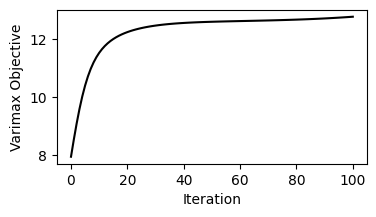

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
ax.plot(varimaxes, color='k')
ax.set_xlabel('Iteration')
ax.set_ylabel('Varimax Objective')
plt.show()

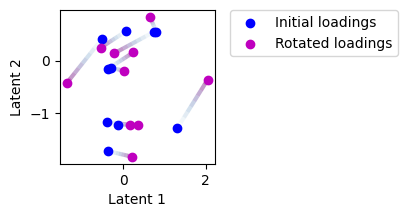

In [21]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter(C_init[:,0],C_init[:,1], color='b', label='Initial loadings')
ax.scatter((C_init @ Rv)[:,0],(C_init @ Rv)[:,1], color='m', label='Rotated loadings')
for n in range(N):
    x = np.linspace(C_init[n,0],(C_init @ Rv)[n,0], 10)
    y = np.linspace(C_init[n,1],(C_init @ Rv)[n,1], 10)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(0, 1)
    lc = LineCollection(segments, cmap='BuPu', norm=norm)
    lc.set_array(np.linspace(0, 1, 10))
    lc.set_linewidth(3)
    lc.set_alpha(0.5)
    lc.set_zorder(0)
    line = ax.add_collection(lc)
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.legend(loc=(1.1,.7))

Finally, let us do it for multiple different rotation matrix initializations.

In [22]:
inits=100
iters=500
lr=.01


#C_init = np.random.randn(N,L)
Cv = C_init.copy()

varimaxes = np.zeros((inits, iters+1))

for init in range(inits):
  R = np.random.randn(L,L)
  U,_,Vt = np.linalg.svd(R)
  R = U @ Vt
  if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt
  Rv = R.copy()
  varimaxes[init,0] = varimax(Cv@R)

  for it in range(iters):
    C_rot = Cv @ Rv
    s = 1/N*np.sum(C_rot**2, axis=0)
    S = np.repeat(s[np.newaxis,:],N,axis=0)
    grad = 4/N*Cv.T @ (C_rot**3-np.multiply(C_rot,S))
    P = 1/2*(grad - Rv @ grad.T @ Rv)

    # apply grad
    Rv = Rv + lr*P

    # project to manifold of rotation matrices
    U, _, Vt = np.linalg.svd(Rv)
    R_new = U @ Vt
    if np.linalg.det(R_new) < 0:
        U[:, -1] *= -1
        R_new = U @ Vt

    Rv = R_new

    varimaxes[init,it+1] = varimax(Cv@Rv)

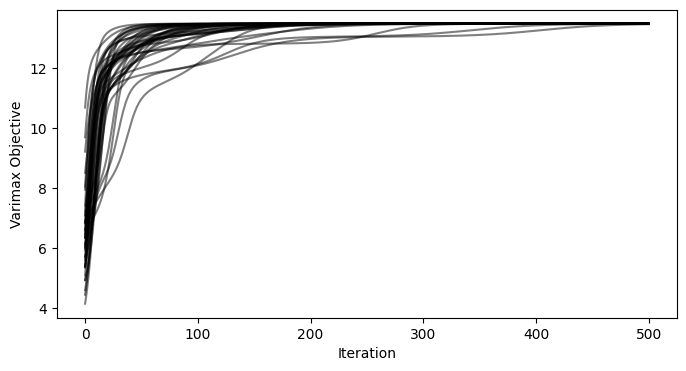

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(varimaxes[:40,:].T, color='k', alpha=0.5);
ax.set_xlabel('Iteration')
ax.set_ylabel('Varimax Objective')
plt.show()